### Random Forest is chosen for Machine Learning due to following reasons:

1. Medium data size
2. Categorical nature of many variables
3. Non-linearity of dataset (Linear relation doesn't exist for many variables as seen in visualization)
4. Underlying complex dependencies between variables
5. Non-parameteric approach without much assumptions

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('finalcleaned.csv')

In [3]:
data.shape

(266291, 50)

In [4]:
print('Datatype of variables:')
data.dtypes#Checking variable data type as numeric type is most easy to deal with

Datatype of variables:


Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                           int64
Reporting_Airline                   object
DOT_ID_Reporting_Airline             int64
IATA_CODE_Reporting_Airline         object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
OriginAirportSeqID                   int64
OriginCityMarketID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
OriginStateFips                      int64
OriginStateName                     object
OriginWac                            int64
DestAirportID                        int64
DestAirportSeqID                     int64
DestCityMarketID                     int64
Dest       

#### Label encoding:

Conversion of categorical values to numericals

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve

In [6]:
le = LabelEncoder()

data["ReportingAirline"] = le.fit_transform(data["Reporting_Airline"])
Reporting_Airline = list(le.classes_)
data["IATA_CODE_ReportingAirline"] = le.fit_transform(data["IATA_CODE_Reporting_Airline"])
IATA_CODE_Reporting_Airline = list(le.classes_)
data["TailNumber"] = le.fit_transform(data["Tail_Number"])
Tail_Number = list(le.classes_)

data["Origin_Point"] = le.fit_transform(data["Origin"])
Origin = list(le.classes_)
data["Origin_CityName"] = le.fit_transform(data["OriginCityName"])
OriginCityName = list(le.classes_)
data["Origin_State"] = le.fit_transform(data["OriginState"])
OriginState = list(le.classes_)
data["OriginState_Name"] = le.fit_transform(data["OriginStateName"])
OriginStateName = list(le.classes_)

data["Destination"] = le.fit_transform(data["Dest"])
Dest = list(le.classes_)
data["Dest_CityName"] = le.fit_transform(data["DestCityName"])
DestCityName = list(le.classes_)
data["Dest_State"] = le.fit_transform(data["DestState"])
DestState = list(le.classes_)
data["Dest_StateName"] = le.fit_transform(data["DestStateName"])
DestStateName = list(le.classes_)

data["DepTime_Blk"] = le.fit_transform(data["DepTimeBlk"])
DepTimeBlk = list(le.classes_)
data["ArrTime_Blk"] = le.fit_transform(data["ArrTimeBlk"])
ArrTimeBlk = list(le.classes_)

In [7]:
data.drop(['Reporting_Airline','IATA_CODE_Reporting_Airline','Tail_Number',
           'Origin','OriginCityName','OriginState','OriginStateName',
          'Dest','DestCityName','DestState','DestStateName',
          'DepTimeBlk','ArrTimeBlk','DepartureDelayGroups','ArrivalDelayGroups'], axis=1, inplace=True)#Removing original encoded columns

In [8]:
print('Dimension reduced to:')
print(len(data.columns))
data.describe()

Dimension reduced to:
48


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,...,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
count,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,2.662910e+05,266291.000000,266291.000000,266291.000000,2.662910e+05,...,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000
mean,2019.137797,2.513003,6.544709,15.703403,3.962271,2.019205e+07,19999.554889,2577.477955,12636.593820,1.263663e+06,...,174.787071,167.212185,22.062184,22.048744,175.172717,168.607178,22.052150,22.019689,8.582919,10.129482
std,0.344687,1.066450,3.282255,8.744020,1.990018,3.254581e+03,372.546166,1806.062252,1515.544301,1.515542e+05,...,96.566512,101.047433,15.274421,15.322300,96.496683,100.695577,15.274984,15.314008,4.830992,5.015868
min,2019.000000,1.000000,1.000000,1.000000,1.000000,2.019030e+07,19393.000000,1.000000,10135.000000,1.013505e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,4.000000,8.000000,2.000000,2.019053e+07,19790.000000,1046.000000,11292.000000,1.129202e+06,...,94.000000,75.000000,7.000000,7.000000,93.000000,75.000000,7.000000,7.000000,4.000000,6.000000
50%,2019.000000,2.000000,6.000000,16.000000,4.000000,2.019081e+07,19977.000000,2170.000000,12889.000000,1.288903e+06,...,187.000000,181.000000,20.000000,20.000000,186.000000,180.000000,20.000000,20.000000,9.000000,11.000000
75%,2019.000000,3.000000,9.000000,23.000000,6.000000,2.019112e+07,20378.000000,3975.000000,13930.000000,1.393007e+06,...,248.000000,255.000000,36.000000,36.000000,248.000000,254.000000,36.000000,36.000000,13.000000,14.000000
max,2020.000000,4.000000,12.000000,31.000000,7.000000,2.020023e+07,20452.000000,7881.000000,16869.000000,1.686901e+06,...,362.000000,355.000000,51.000000,51.000000,361.000000,354.000000,51.000000,51.000000,18.000000,18.000000


All variables are now numeric. But above statistics makes sense only for originally numeric variables. For e.g. central tendency measures for Year, Airline ID etc. do not make much sense.

Creation of dataset for modeling

In [9]:
# Data set up as predictors and target
np.random.seed(10)
Delay_YesNo = data['ArrDel15']
data.drop(['ArrDel15'], axis=1, inplace=True)#Removing target variable
print('Dimension reduced to:')
print(len(data.columns))
data_part2 = pd.DataFrame(data)
data_part3 = pd.DataFrame(data)
data_part4 = pd.DataFrame(data)

Dimension reduced to:
47


Train:Test split = 80:20

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(data_part2, Delay_YesNo, test_size=0.2, random_state=42)

Grid search

In [11]:
startTimeGS = datetime.now()
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10],
                 'min_samples_split': [2, 4],
                 'min_samples_leaf': [2, 4],
                 'max_features': ['sqrt', 'log2'],
                 "criterion" : ["gini"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=5,n_jobs=-1)
grid_rf.fit(X_train, Y_train)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:01:34.205490 ] seconds.


In [12]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


{'mean_fit_time': array([16.39562616, 16.27633953, 15.25445685, 15.52829771, 15.79513874,
        15.0024941 , 15.59672346, 12.63876233]),
 'std_fit_time': array([1.32110644, 1.45047492, 1.52654404, 0.91255513, 1.07706006,
        1.4287929 , 1.18757265, 0.59011163]),
 'mean_score_time': array([0.34702148, 0.30528502, 0.30203347, 0.32081723, 0.37898731,
        0.35342379, 0.329918  , 0.22058229]),
 'std_score_time': array([0.06957975, 0.02852448, 0.02985435, 0.03600789, 0.0296536 ,
        0.02410208, 0.02857582, 0.04757436]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'log2', 'log2', 'log2',
                    'log2'],
              mask=[False, False, False, False, False, False, False, False],
        f

- Best model and parameters from above are used to train the final model on entire training set
- 5 fold Cross validation is performed to find the overall error

In [13]:
startTimeRF = datetime.now()
rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
                            min_samples_split=bestParameters.get('min_samples_split'),
                            min_samples_leaf = bestParameters.get('min_samples_leaf'),
                            max_features = bestParameters.get('max_features'),
                            criterion = bestParameters.get('criterion'))
cv = KFold(n_splits=5, shuffle=True, random_state=2)
cvScores = cross_val_score(rf, X_train, Y_train, cv=cv,n_jobs=-1)
print ('Mean cross validation score is: ' + str(np.mean(cvScores)))
rf.fit(X_train, Y_train)
print('Random forest training and testing with with non-redundant variables took [', 
      datetime.now() - startTimeRF, '] seconds.')

Mean cross validation score is: 0.9251943475237379
Random forest training and testing with with non-redundant variables took [ 0:00:19.039361 ] seconds.


**Performance evaluation**
- Prediction is done on the hold out test set to evaluate performance
- Confusion matrix, Accuracy and Recall are computed
- ROC curve is also plotted to pictorically depict 'Area under curve (AUC)' as 'Accuracy'

Accuracy: 93.07%
Recall: 92.27%
Confusion matrix:
[[24874  1624]
 [ 2068 24693]]
Area under the ROC curve: 0.06928213912903453


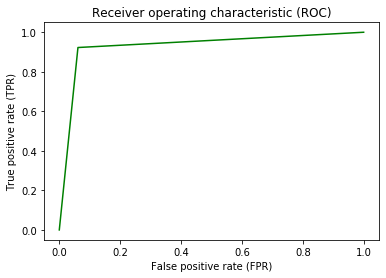

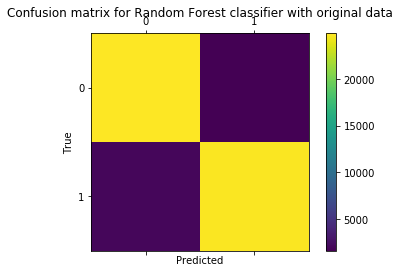

In [14]:
Y_rf_pred = rf.predict(X_test)

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_rf_pred,labels)

print('Accuracy: ' + str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))+'%')
print('Recall: ' + str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))+'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(Y_test, Y_rf_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forest classifier with original data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Inferences 1:**
- High accuracy was obtained when model was first created.
- This prompted cross validation with 5-fold in order to be convinced that it wasnt a chance performance (10-fold would have been better)
- Accuracy would definately improve when more data is added. More data is always better than any sophisticated model!
- Inferences from exploratory analysis was critical in doing feature selection and obtaining good performance
- E.g. Certain features (DepTimeBlk, Month etc.) with substantial variation were added to improve performance
- Handling of class imbalance improved Accuracy and Recall respectively by more than 10% and 15%

**Model creation with non-redundant raw data**

Feature Selection to remove redundant variables

Creation of data subset: 
Predictor and target variable columns along with some basic statistics

In [15]:
#Data set up as predictors and target
np.random.seed(10)
rfDataOriginal = pd.DataFrame(data_part3)
print('Dimension reduced to:')
print(len(rfDataOriginal.columns))
data.describe()

Dimension reduced to:
47


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,...,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
count,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,2.662910e+05,266291.000000,266291.000000,266291.000000,2.662910e+05,...,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000,266291.000000
mean,2019.137797,2.513003,6.544709,15.703403,3.962271,2.019205e+07,19999.554889,2577.477955,12636.593820,1.263663e+06,...,174.787071,167.212185,22.062184,22.048744,175.172717,168.607178,22.052150,22.019689,8.582919,10.129482
std,0.344687,1.066450,3.282255,8.744020,1.990018,3.254581e+03,372.546166,1806.062252,1515.544301,1.515542e+05,...,96.566512,101.047433,15.274421,15.322300,96.496683,100.695577,15.274984,15.314008,4.830992,5.015868
min,2019.000000,1.000000,1.000000,1.000000,1.000000,2.019030e+07,19393.000000,1.000000,10135.000000,1.013505e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,4.000000,8.000000,2.000000,2.019053e+07,19790.000000,1046.000000,11292.000000,1.129202e+06,...,94.000000,75.000000,7.000000,7.000000,93.000000,75.000000,7.000000,7.000000,4.000000,6.000000
50%,2019.000000,2.000000,6.000000,16.000000,4.000000,2.019081e+07,19977.000000,2170.000000,12889.000000,1.288903e+06,...,187.000000,181.000000,20.000000,20.000000,186.000000,180.000000,20.000000,20.000000,9.000000,11.000000
75%,2019.000000,3.000000,9.000000,23.000000,6.000000,2.019112e+07,20378.000000,3975.000000,13930.000000,1.393007e+06,...,248.000000,255.000000,36.000000,36.000000,248.000000,254.000000,36.000000,36.000000,13.000000,14.000000
max,2020.000000,4.000000,12.000000,31.000000,7.000000,2.020023e+07,20452.000000,7881.000000,16869.000000,1.686901e+06,...,362.000000,355.000000,51.000000,51.000000,361.000000,354.000000,51.000000,51.000000,18.000000,18.000000


**Check for multi-collinearity of variables**

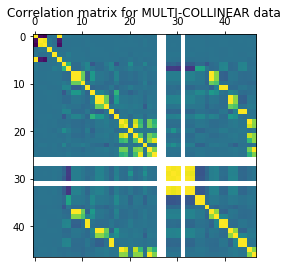

In [16]:
plt.matshow(rfDataOriginal.corr())
plt.title('Correlation matrix for MULTI-COLLINEAR data')
corr = rfDataOriginal.corr()
#corr

Note: Darker cells indicate high collinearity

In [17]:
corr = rfDataOriginal.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('Year', 'FlightDate'),
 ('Quarter', 'Month'),
 ('OriginAirportID', 'OriginAirportSeqID'),
 ('OriginAirportID', 'Origin_Point'),
 ('OriginAirportSeqID', 'Origin_Point'),
 ('OriginStateFips', 'Origin_State'),
 ('OriginStateFips', 'OriginState_Name'),
 ('DestAirportID', 'DestAirportSeqID'),
 ('DestAirportID', 'Destination'),
 ('DestAirportSeqID', 'Destination'),
 ('DestStateFips', 'Dest_State'),
 ('DestStateFips', 'Dest_StateName'),
 ('CRSDepTime', 'DepTime'),
 ('CRSDepTime', 'WheelsOff'),
 ('CRSDepTime', 'DepTime_Blk'),
 ('DepTime', 'WheelsOff'),
 ('DepTime', 'DepTime_Blk'),
 ('WheelsOff', 'DepTime_Blk'),
 ('WheelsOn', 'ArrTime'),
 ('CRSArrTime', 'ArrTime_Blk'),
 ('CRSElapsedTime', 'ActualElapsedTime'),
 ('CRSElapsedTime', 'AirTime'),
 ('CRSElapsedTime', 'Distance'),
 ('CRSElapsedTime', 'DistanceGroup'),
 ('ActualElapsedTime', 'AirTime'),
 ('ActualElapsedTime', 'Distance'),
 ('ActualElapsedTime', 'DistanceGroup'),
 ('AirTime', 'Distance'),
 ('AirTime', 'DistanceGroup'),
 ('Distance', '

**Removal of only redundant columns**

In [18]:
#Subsetting to remove redundant variables using results from above cell for quick filtering
rfDataOriginal.drop(['OriginAirportSeqID','OriginCityMarketID', 'OriginStateFips', 'OriginWac', 
                     'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac',
                     'CRSDepTime', 'CRSElapsedTime', 'CRSArrTime','IATA_CODE_ReportingAirline', 
                     'Origin_Point', 'Origin_CityName', 'Origin_State', 'OriginState_Name', 
                     'Destination', 'Dest_CityName', 'Dest_State', 'Dest_StateName'], axis=1, inplace=True)

In [19]:
print('Dimension finally reduced to:')
print(len(rfDataOriginal.columns))
list(rfDataOriginal.columns)

Dimension finally reduced to:
27


['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'DOT_ID_Reporting_Airline',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'DestAirportID',
 'DepTime',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'ArrTime',
 'Cancelled',
 'Diverted',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'ReportingAirline',
 'TailNumber',
 'DepTime_Blk',
 'ArrTime_Blk']

**Model building with non-redundant variables**



Train:Test split = 80:20

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(rfDataOriginal, Delay_YesNo, test_size=0.2, random_state=42)

Grid search

In [21]:
startTimeGS = datetime.now()
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10],
                 'min_samples_split': [2, 4],
                 'min_samples_leaf': [2, 4],
                 'max_features': ['sqrt', 'log2'],
                 "criterion" : ["gini"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=5,n_jobs=-1)
grid_rf.fit(X_train, Y_train)
bestModel = grid_rf.best_estimator_
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:01:10.096583 ] seconds.


In [22]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


{'mean_fit_time': array([13.0138586 , 13.37789097, 12.90081501, 12.82971463, 11.29899902,
        11.5602241 , 11.245151  , 11.24065924]),
 'std_fit_time': array([0.22342228, 0.24268055, 0.08965633, 0.18855906, 0.21866982,
        0.14767016, 0.08941158, 0.18906003]),
 'mean_score_time': array([0.31867723, 0.34679379, 0.27819505, 0.28430781, 0.31242733,
        0.30976276, 0.28771963, 0.20023842]),
 'std_score_time': array([5.97705308e-02, 4.77924383e-02, 1.18176653e-02, 1.16883974e-02,
        8.17605410e-07, 2.59157181e-02, 2.49591037e-02, 2.31989437e-02]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'log2', 'log2', 'log2',
                    'log2'],
              mask=[False, False, False, False, False,

- Best model and parameters from above are used to train the final model on entire training set
- 5-fold Cross validation is performed to find the overall error

In [23]:
startTimeRF = datetime.now()
rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
                            min_samples_split=bestParameters.get('min_samples_split'),
                           min_samples_leaf = bestParameters.get('min_samples_leaf'),
                           max_features = bestParameters.get('max_features'),
                           criterion = bestParameters.get('criterion'))
cv = KFold(n_splits=5, shuffle=True, random_state=2)
cvScores = cross_val_score(rf, X_train, Y_train, cv=cv, n_jobs=-1)
print ('Mean cross validation score is: ' + str(np.mean(cvScores)))
rf.fit(X_train, Y_train)
print('Random forest training and testing with with non-redundant variables took [', 
      datetime.now() - startTimeRF, '] seconds.')

Mean cross validation score is: 0.8906596171925185
Random forest training and testing with with non-redundant variables took [ 0:00:16.489420 ] seconds.


Performance evaluation
- Prediction is done on the hold out test set to evaluate performance
- Confusion matrix, Accuracy and Recall are computed
- ROC curve is also plotted to pictorically depict 'Area under curve (AUC)' as 'Accuracy'

Accuracy: 89.38%
Recall: 88.3%
Confusion matrix:
[[23972  2526]
 [ 3130 23631]]
Area under the ROC curve: 0.10614459942940149


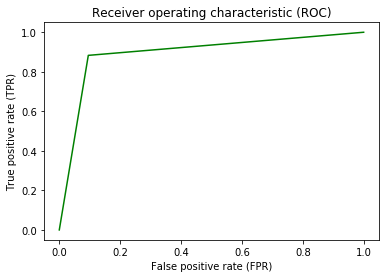

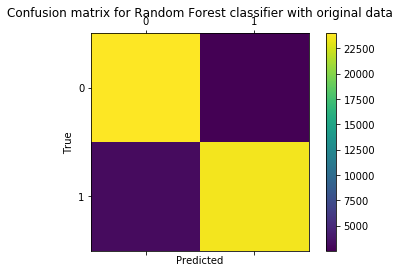

In [24]:
Y_rf_pred = rf.predict(X_test)

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_rf_pred,labels)

print('Accuracy: ' + str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))+'%')
print('Recall: ' + str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))+'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(Y_test, Y_rf_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forest classifier with original data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Inferences 2:
- It appears that the removal of redundant variables has marginally reduced perfomrnace by 3-5%
- This seems to indicate that Random Forest works well with highly-correlated data that has many interactions
- In a nutshell, multicollinearity hasn't affected overall model prediction. But, it can cause overfitting and is not a concern here in the light of results from cross validation.